In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
#!{sys.executable} -m pip install seaborn
import seaborn as sns
import numpy as np

## BLIS

In [3]:
data_blis = pd.read_csv("/home/crulli/crulli/OldBenchmark/two_bits_vs_packed_vs_blis_vs2_2.csv", sep="\t", index_col=False)
data_fbgemm = pd.read_csv("../../BenchmarkCosimo/logs/fbgemm_resnet18.csv", sep="\t", index_col=False)
data_blis = pd.concat([data_blis, data_fbgemm])
data_blis = data_blis.assign(shape =  lambda x: x["M"] + x["K"] + x["N"])
data_blis = data_blis.assign(gflops = lambda x:  (x["M"] * x["N"] * x["K"]) / x["min_elapsed"])
data_blis["speedup"] = data_blis.groupby('shape').min_elapsed.transform(np.max) / data_blis.min_elapsed 
data_blis = data_blis[data_blis["lib"] != "blis"]

data_blis = data_blis[data_blis["lib"] != "kernel_1_2_8x8_output_packed"]


FileNotFoundError: [Errno 2] No such file or directory: '/home/crulli/crulli/OldBenchmark/two_bits_vs_packed_vs_blis_vs2_2.csv'

In [ ]:
#sns.barplot(x = "shape", y = "min_elapsed", hue ="lib", data=data)
#plt.figure(figsize=(10,5))
sns.set_palette(sns.color_palette("Set2"))

order = ["Bin Kernel 512 8x8","kernel8x8 64 bit", "kernel 2/2 8x8", "Packed u8i8 with FBGEMM", "blis"]
sns.barplot(x = "shape", y = "speedup", hue ="lib", data=data_blis,hue_order=order)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
#new_labels = ["binary", "1-2", "1-2 with packing", "2-2", "8-8", "BLIS"]
new_labels = ["1/1", "1/2", "2/2", "8/8"]

#plt.legend(current_handles, new_labels, bbox_to_anchor=(1.02, 1), loc='upper left',)
plt.legend(current_handles, new_labels, ncol=2 )

plt.xlabel("Shape")
plt.ylabel("Speedup")
ticks = plt.xticks()
labels = dict()
for x in data_blis[["M", "K", "N", "shape"]].values:
    labels[f"M: {x[0]}\nK: {x[1]}\nN: {x[2]}"] = x[3]
rev_labels = {str(v):k for k,v in labels.items()}
new_ticks = [rev_labels[t._text] for t in ticks[1]]
plot = plt.xticks(range(len(ticks[1])), new_ticks) 
print(plt.yticks())
plt.ylim([0, 29.5])
plt.tight_layout()
plt.savefig("Bitwise_comparison_blis.pdf", dpi=300, bbox_inches="tight")

In [ ]:
data_blis.sort_values(["shape", "lib"])

## DNNL

In [ ]:
data = pd.read_csv("/home/crulli/crulli/OldBenchmark/two_bits_vs_packed_vs_blis_vs2_2.csv", sep="\t", index_col=False)
data_dnnl = pd.read_csv("dnnl_resnet18.csv", sep="\t", index_col=False)
data = pd.concat([data, data_dnnl])
#data = pd.concat([data, data_dnnl])
data = data.assign(shape =  lambda x: x["M"] + x["K"] + x["N"])
data = data.assign(gflops = lambda x:  (x["M"] * x["N"] * x["K"]) / x["min_elapsed"])
data = data[data["lib"] != "kernel_1_2_8x8_output_packed"]
data = data[data["lib"] != "blis"]
data["speedup"] = data.groupby('shape').min_elapsed.transform(np.max) / data.min_elapsed 
data = data[data["lib"] != "Intel oneDNN"]


In [ ]:

data = pd.read_csv("/home/crulli/crulli/OldBenchmark/two_bits_vs_packed_vs_blis_vs2_2.csv", sep="\t", index_col=False)
#data_dnnl = pd.read_csv("dnnl_resnet18.csv", sep="\t", index_col=False)

In [ ]:
data_fbgemm = pd.read_csv("fbgemm_resnet18.csv", sep="\t", index_col=False)

data_fbgemm = data_fbgemm.assign(speedup = data_fbgemm["min_elapsed"].values / data_dnnl["min_elapsed"].values)
data = pd.concat([data, data_fbgemm])

In [ ]:
#sns.barplot(x = "shape", y = "min_elapsed", hue ="lib", data=data)

sns.set_style('darkgrid')
sns.set_context("notebook")

#plt.figure(figsize=(10,6.5))
sns.set_palette(sns.color_palette("Set2"))

order = ["Bin Kernel 512 8x8","kernel8x8 64 bit", "kernel 2/2 8x8", "Packed u8i8 with FBGEMM", "blis"]
sns.barplot(x = "shape", y = "speedup", hue ="lib", data=data,hue_order=order)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
#new_labels = ["binary", "1-2", "1-2 with packing", "2-2", "8-8", "BLIS"]
new_labels = ["1/1", "1/2", "2/2", "8/8"]

#plt.legend(current_handles, new_labels, bbox_to_anchor=(1.02, 1), loc='upper left',)
plt.legend(current_handles, new_labels, ncol=2 )

plt.xlabel("Shape")
plt.ylabel("Speedup")
ticks = plt.xticks()
labels = dict()
for x in data[["M", "K", "N", "shape"]].values:
    labels[f"M: {x[0]}\nK: {x[1]}\nN: {x[2]}"] = x[3]
rev_labels = {str(v):k for k,v in labels.items()}
new_ticks = [rev_labels[t._text] for t in ticks[1]]
plot = plt.xticks(range(len(ticks[1])), new_ticks) 
print(plt.yticks())
#plt.ylim([0, 29.5])
plt.tight_layout()
plt.savefig("Bitwise_comparison_ddnl.pdf", dpi=300, bbox_inches="tight")

## DNNL and BLIS

In [24]:
data = pd.read_csv("/home/crulli/crulli/OldBenchmark/two_bits_vs_packed_vs_blis_vs2_2.csv", sep="\t", index_col=False)
data = data.assign(shape =  lambda x: x["M"] + x["K"] + x["N"])
data = data[data["lib"] != "kernel_1_2_8x8_output_packed"]
data["speedup_blis"] = data.groupby('shape').min_elapsed.transform(np.max) / data.min_elapsed 
data_blis = data[data.lib == "blis"]

In [25]:
data_fbgemm = pd.read_csv("fbgemm_resnet18.csv", sep="\t", index_col=False)
data_fbgemm = data_fbgemm.assign(shape =  lambda x: x["M"] + x["K"] + x["N"])
data_fbgemm = data_fbgemm.assign(speedup_blis = data_blis["min_elapsed"].values / data_fbgemm["min_elapsed"].values)

In [26]:
complete_data_blis = pd.concat([data, data_fbgemm])
complete_data_blis = complete_data_blis[complete_data_blis.lib != "blis"]

In [35]:
data = pd.read_csv("/home/crulli/crulli/OldBenchmark/two_bits_vs_packed_vs_blis_vs2_2.csv", sep="\t", index_col=False)
data_dnnl = pd.read_csv("dnnl_resnet18.csv", sep="\t", index_col=False)
data = pd.concat([data, data_dnnl])
data = data.assign(shape =  lambda x: x["M"] + x["K"] + x["N"])
data = data.assign(gflops = lambda x:  (x["M"] * x["N"] * x["K"]) / x["min_elapsed"])
data = data[data["lib"] != "kernel_1_2_8x8_output_packed"]
data = data[data["lib"] != "blis"]
data["speedup_dnnl"] = data.groupby('shape').min_elapsed.transform(np.max) / data.min_elapsed 
data_dnnl = data[data.lib == "Intel oneDNN"]
data = data[data["lib"] != "Intel oneDNN"]


In [36]:
data_fbgemm = pd.read_csv("fbgemm_resnet18.csv", sep="\t", index_col=False)
data_fbgemm = data_fbgemm.assign(shape =  lambda x: x["M"] + x["K"] + x["N"])
data_fbgemm = data_fbgemm.assign(speedup_dnnl = data_dnnl["min_elapsed"].values / data_fbgemm["min_elapsed"].values)

In [38]:
complete_data_dnnl = pd.concat([data_fbgemm, data])

3556
3556
3556
3620
3620
3620
1956
1956
1956
2084
2084
2084
2704
2704
2704
2960
2960
2960
5145
5145
5145
3556
3620
1956
2084
2704
2960
5145
{'3556': 'M: 64\nK: 576\nN: 2916', '3620': 'M: 128\nK: 576\nN: 2916', '1956': 'M: 128\nK: 1152\nN: 676', '2084': 'M: 256\nK: 1152\nN: 676', '2704': 'M: 256\nK: 2304\nN: 144', '2960': 'M: 512\nK: 2304\nN: 144', '5145': 'M: 512\nK: 4608\nN: 25'}


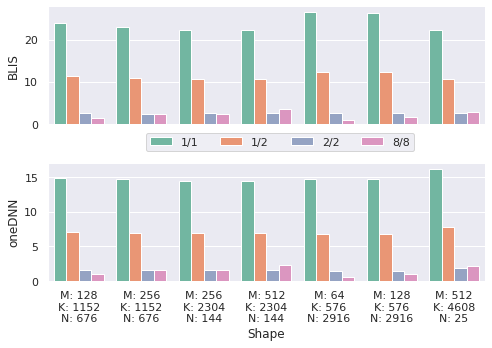

In [41]:
sns.set_style('darkgrid')
sns.set_context("notebook")
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

#sns.barplot(x = "shape", y = "min_elapsed", hue ="lib", data=data)
#plt.figure(figsize=(10,5))
sns.set_palette(sns.color_palette("Set2"))
order = ["Bin Kernel 512 8x8","kernel8x8 64 bit", "kernel 2/2 8x8", "Packed u8i8 with FBGEMM"]


sns.barplot(x = "shape", y = "speedup_blis", hue ="lib", data=complete_data_blis, hue_order=order, ax=ax1)
sns.barplot(x = "shape", y = "speedup_dnnl", hue ="lib", data=complete_data_dnnl, hue_order=order, ax=ax2)


current_handles, current_labels = plt.gca().get_legend_handles_labels()
new_labels = ["1/1", "1/2", "2/2", "8/8"]
ax1.legend(current_handles, new_labels, ncol=4, bbox_to_anchor=(0.85, -0.025 ))
ax1.set_xlabel("")
ax1.set_ylabel("BLIS")
ax2.set_ylabel("oneDNN")

ax2.get_legend().remove()
# ax1.set_xlabel("Shape")
# ax1.set_ylabel("Speedup BLIS")
ticks = ax2.get_xticklabels()
labels = dict()
for x in data[["M", "K", "N", "shape"]].values:
    labels[f"M: {x[0]}\nK: {x[1]}\nN: {x[2]}"] = x[3]
    print(x[3])

for x in data_blis[["M", "K", "N", "shape"]].values:
    #labels[f"M: {x[0]}\nK: {x[1]}\nN: {x[2]}"] = x[3]
    print(x[3])
rev_labels = {str(v):k for k,v in labels.items()}
print(rev_labels)
new_ticks = [rev_labels[t._text] for t in ticks]
# #ax1 = plt.xticks(range(len(ticks[1])), new_ticks) 
ax2.set_xticklabels(new_ticks)
ax2.set_xlabel("Shape")
# plt.ylim([0, 29.5])
# plt.tight_layout()
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=1)
plt.savefig("Bitwise_comparison_blis_and_dnnl.pdf", dpi=300, bbox_inches="tight")


In [ ]:
ax2.get_xticklabels()

## OTHER STUFF

In [ ]:
data = data.assign(gflops = lambda x:  (x["M"] * x["N"] * x["K"]) / x["min_elapsed"])

data[data.lib == "Bin Kernel 512 8x8"].gflops / (3.4 * 2048 / 6)
data[data.lib == "Bin Kernel 512 8x8"].gflops / (3.4 * 2048 / 6)

In [ ]:
data[data.lib == 'kernel8x8 64 bit'].gflops / (3.4 * 2048 / 12)

In [ ]:
data[data.lib == 'kernel 2/2 8x8'].gflops / (3.4 * 2048 / 48)

In [ ]:
kernel 2/2 8x8

In [ ]:
data = data[data["lib"] != "blis"]

data["speedup"] = data.groupby('shape').min_elapsed.transform(np.max) / data.min_elapsed 

In [ ]:
#remove Onednn
data = data[data["lib"] != "kernel_1_2_8x8_output_packed"]



In [ ]:
data

In [ ]:


sns.barplot(x = "shape", y = "speedup", hue ="lib", data=data)#,hue_order=order)
current_handles, current_labels = plt.gca().get_legend_handles_labels()
#new_labels = ["binary", "1-2", "1-2 with packing", "2-2", "8-8", "BLIS"]
new_labels = ["1/1", "1/2", "2/2"]
plt.legend(current_handles, new_labels, ncol=2 )

plt.xlabel("Shape")
plt.ylabel("Speedup")
ticks = plt.xticks()
labels = dict()
for x in data[["M", "K", "N", "shape"]].values:
    labels[f"M: {x[0]}\nK: {x[1]}\nN: {x[2]}"] = x[3]
rev_labels = {str(v):k for k,v in labels.items()}
new_ticks = [rev_labels[t._text] for t in ticks[1]]
plot = plt.xticks(range(len(ticks[1])), new_ticks) 

In [ ]:

order = ["Bin Kernel 512 8x8","kernel8x8 64 bit", "kernel 2/2 8x8", "Packed u8i8 with FBGEMM", "blis"]

In [ ]:
# Remove blis
data = data[data["lib"] != "blis"]
#Remove packed
data = data["kernel_1_2_8x8_output_packed" != data["lib"]]


In [ ]:
#sns.barplot(x = "shape", y = "min_elapsed", hue ="lib", data=data)
#sns.set_palette(sns.color_palette("Set2"))


sns.barplot(x = "shape", y = "speedup", hue ="lib", data=data,hue_order=order)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
#new_labels = ["binary", "1-2", "1-2 with packing", "2-2", "8-8", "BLIS"]
new_labels = ["1/1", "1/2", "2/2", "8/8"]

#plt.legend(current_handles, new_labels, bbox_to_anchor=(1.02, 1), loc='upper left',)
plt.legend(current_handles, new_labels, ncol=2 )

plt.xlabel("Shape")
plt.ylabel("Speedup")
ticks = plt.xticks()
labels = dict()
for x in data[["M", "K", "N", "shape"]].values:
    labels[f"M: {x[0]}\nK: {x[1]}\nN: {x[2]}"] = x[3]
rev_labels = {str(v):k for k,v in labels.items()}
new_ticks = [rev_labels[t._text] for t in ticks[1]]
plot = plt.xticks(range(len(ticks[1])), new_ticks) 
print(plt.yticks())
plt.ylim([0, 29.5])
plt.tight_layout()
plt.savefig("Bitwise_comparison.pdf", dpi=300,bbox_inches="tight")

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x = "shape", y = "speedup", hue ="lib", data=data,hue_order=order)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
#new_labels = ["binary", "1-2", "1-2 with packing", "2-2", "8-8", "BLIS"]
new_labels = ["1/1", "1/2", "2/2", "8/8"]

#plt.legend(current_handles, new_labels, bbox_to_anchor=(1.02, 1), loc='upper left',)
plt.legend(current_handles, new_labels, ncol=2 )

plt.xlabel("Shape")
plt.ylabel("Speedup")
ticks = plt.xticks()
labels = dict()
for x in data[["M", "K", "N", "shape"]].values:
    labels[f"M: {x[0]}\nK: {x[1]}\nN: {x[2]}"] = x[3]
rev_labels = {str(v):k for k,v in labels.items()}
new_ticks = [rev_labels[t._text] for t in ticks[1]]
plot = plt.xticks(range(len(ticks[1])), new_ticks) 
print(plt.yticks())
plt.ylim([0, 29.5])
plt.tight_layout()
plt.savefig("Bitwise_comparison.pdf", dpi=300,bbox_inches="tight")

In [ ]:
!realpath Bitwise_comparison.pdf

In [ ]:
labels

In [ ]:
rev_labels = {str(v):k for k,v in labels.items()}
rev_labels

In [ ]:
new_ticks = [rev_labels[t._text] for t in ticks[1]]

In [ ]:
new_ticks

In [ ]:
sns.barplot(x = "shape", y = "gflops", hue ="lib", data=data)
current_handles, current_labels = plt.gca().get_legend_handles_labels()
new_labels = ["binary", "1-2", "1-2 with packing"]
plt.legend(current_handles,new_labels, bbox_to_anchor=(1.02, 1), loc='upper left',)
plt.xlabel("Shape")
plt.ylabel("GFLOP(s)")
ticks = plt.xticks()
labels = dict()
for x in data[["M", "K", "N", "shape"]].values:
    labels[f"M: {x[0]}\nK: {x[1]}x\nN: {x[2]}"] = x[3]
rev_labels = {str(v):k for k,v in labels.items()}
new_ticks = [rev_labels[t._text] for t in ticks[1]]
t  = plt.xticks(range(len(ticks[1])), new_ticks) 


In [ ]:
data[data.lib == "kernel 2/2 8x8"]